In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
# import datasets
iris=datasets.load_iris()
iris_data=pd.DataFrame(iris.data)
iris_data.columns=iris.feature_names
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
# standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(iris_data)
X_scaled
X_scaled.shape

(150, 4)

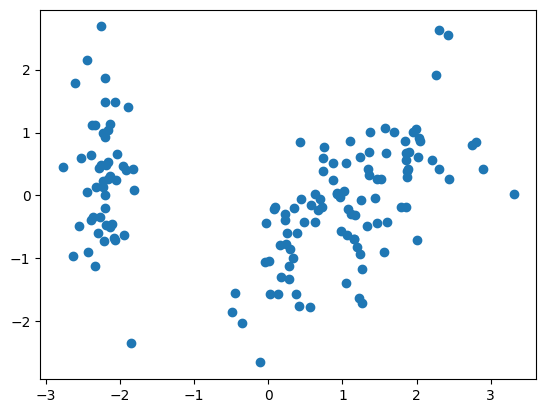

In [4]:
## apply pca
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca
pca_scaled=pca.fit_transform(X_scaled)
pca_scaled
plt.scatter(pca_scaled[:,0],pca_scaled[:,1])

Text(0, 0.5, 'eucledian distance')

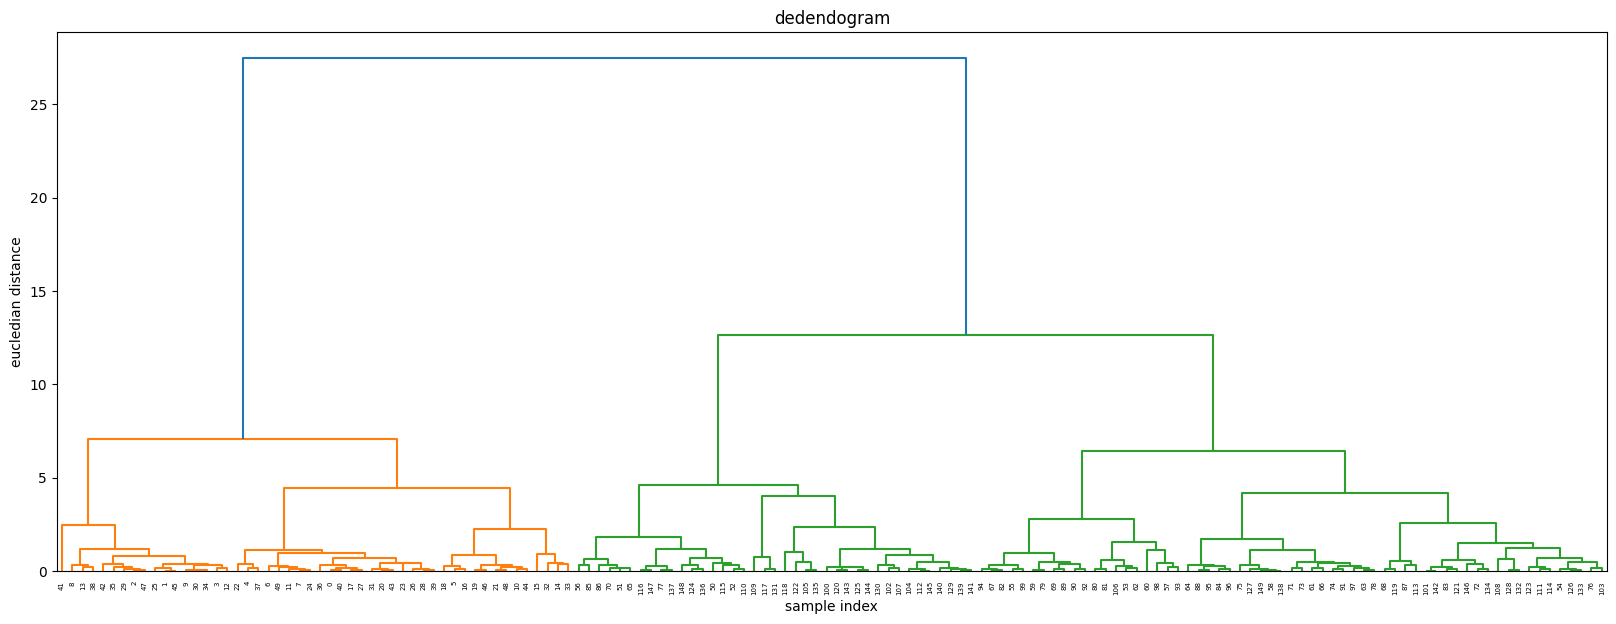

In [5]:
# agglomerative clustering
# to construct dendogram
import scipy.cluster.hierarchy as sc
plt.figure(figsize=(20,7))
plt.title("Dendograms")
sc.dendrogram(sc.linkage(pca_scaled,method='ward'))
plt.title('dedendogram')
plt.xlabel('sample index')
plt.ylabel('eucledian distance')



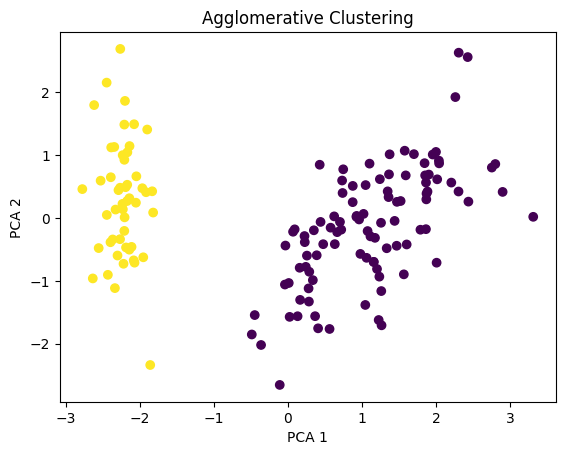

In [11]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# No 'affinity' when using linkage='ward'
cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')
cluster.fit(pca_scaled)

# Plotting
plt.scatter(pca_scaled[:, 0], pca_scaled[:, 1], c=cluster.labels_, cmap='viridis')
plt.title("Agglomerative Clustering")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()



In [13]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

silhouette_coefficients = []

for k in range(2, 11):
    # Remove 'affinity' when using 'ward'
    agglo = AgglomerativeClustering(n_clusters=k, linkage='ward')
    agglo.fit(X_scaled)
    score = silhouette_score(X_scaled, agglo.labels_)
    silhouette_coefficients.append(score)

print(silhouette_coefficients)


[np.float64(0.5770346019475988), np.float64(0.4466890410285909), np.float64(0.4006363159855973), np.float64(0.33058726295230545), np.float64(0.31485480100512825), np.float64(0.316969830299128), np.float64(0.310946529007258), np.float64(0.31143422475471655), np.float64(0.3161120375980681)]


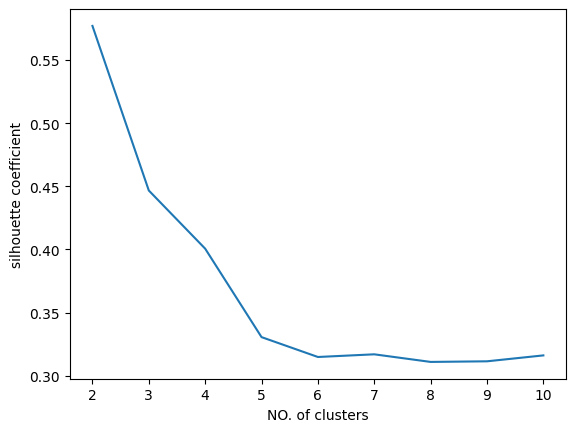

In [14]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("NO. of clusters")
plt.ylabel("silhouette coefficient")
plt.show()